Foundations of Machine Learning and 
EDA| Assignment 

# Question 1: AI vs. ML vs. DL vs. Data Science
> (Hint: Compare their scope, techniques, and applications for each.)

**Answer:**

* **Artificial Intelligence (AI):** The broad concept of creating systems that simulate human intelligence (e.g., reasoning, problem-solving). It's the overall umbrella.
    * **Applications:** Virtual assistants, game-playing engines.

* **Machine Learning (ML):** A **subset of AI**. An *approach* where systems learn patterns from data, rather than being explicitly programmed.
    * **Applications:** Spam filters, recommendation engines.

* **Deep Learning (DL):** A specialized **subset of ML** that uses multi-layered neural networks to solve complex problems.
    * **Applications:** Self-driving cars, image recognition, language translation.

* **Data Science:** An interdisciplinary field that **uses** ML, DL, stats, and domain expertise to extract insights from data. It's the entire process (collection, cleaning, analysis, modeling).
    * **Applications:** Business strategy, scientific research.

# Question 2: Overfitting and Underfitting
> (Hint: Discuss bias-variance tradeoff, cross-validation, and regularization techniques.)

**Answer:**

### Overfitting
* **What it is:** The model learns the training data *too well*, capturing noise. It fails to generalize to new, unseen data.
* **Symptoms:** High accuracy on training data, low accuracy on test data.
* **Bias-Variance:** Low Bias, **High Variance**.
* **Prevention:** 
    1.  **Regularization:** (L1/L2) Adds a penalty for complex models.
    2.  **Get More Data:** Helps learn the true underlying pattern.
    3.  **Simplify Model:** Use a less complex algorithm.

### Underfitting
* **What it is:** The model is *too simple* to capture the underlying pattern. It fails on both training and test data.
* **Symptoms:** Low accuracy on *both* training and test data.
* **Bias-Variance:** **High Bias**, Low Variance.
* **Prevention:** 
    1.  **Use a More Complex Model:** e.g., move from linear to polynomial regression.
    2.  **Feature Engineering:** Add more informative features.

# Question 3: Handling Missing Values
> (Hint: Consider deletion, mean/median imputation, and predictive modeling.)

**Answer:**

### 1. Deletion (Listwise/Row Deletion)
* **Explanation:** Remove entire rows (or columns) that contain missing values.
* **Pros:** Simple.
* **Cons:** Can cause significant data loss and introduce bias.

### 2. Mean/Median/Mode Imputation
* **Explanation:** Replace missing values with the central tendency of that feature.
    * **Mean:** For normally distributed numerical data.
    * **Median:** For skewed numerical data (robust to outliers).
    * **Mode:** For categorical data.
* **Pros:** Simple, preserves data size.
* **Cons:** Reduces variance and distorts relationships between features.

### 3. Predictive Modeling (e.g., KNN or Regression Imputation)
* **Explanation:** Use other features to predict the missing value. A KNN imputer finds similar rows and averages them; a regression imputer trains a model to predict the value.
* **Pros:** More accurate; preserves relationships between features.
* **Cons:** Computationally expensive.

# Question 4: Imbalanced Dataset
> (Hint: Discuss SMOTE, Random Under/Oversampling, and class weights in models.)

**Answer:**

An **imbalanced dataset** is one where classes are not equally represented (e.g., 99% non-fraud, 1% fraud). This biases models toward the majority class.

### 1. Random Oversampling
* **Theoretical:** Duplicates random samples from the minority class to balance the dataset. This is done *only* on the training set.
* **Practical (`imblearn`):**
    ```python
    from imblearn.over_sampling import RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
    ```
* **Con:** Can lead to overfitting.

### 2. SMOTE (Synthetic Minority Over-sampling TEchnique)
* **Theoretical:** Intelligently creates *new synthetic* samples for the minority class. It finds a minority sample, picks one of its k-nearest minority neighbors, and creates a new sample on the line segment between them.
* **Practical (`imblearn`):**
    ```python
    from imblearn.over_sampling import SMOTE
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X_train, y_train)
    ```
* **Pro:** Creates new, plausible data, which generalizes better.

# Question 5: Feature Scaling
> (Hint: Explain impact on distance-based algorithms (e.g., KNN, SVM) and gradient descent.)

**Answer:**

**Feature scaling** is crucial because many algorithms are sensitive to the range of the data:

1.  **Distance-Based Algorithms (KNN, SVM):** These algorithms calculate distances. A feature with a large range (e.g., 'Salary' 30k-150k) will dominate one with a small range (e.g., 'Age' 20-70). Scaling brings all features to a common ground.
2.  **Gradient Descent (Linear Regression, Neural Networks):** Scaling helps the algorithm converge much faster. Unscaled features create an elongated, narrow loss surface, forcing the algorithm to take a slow, zig-zag path to the minimum.

### Comparison

| Feature | Min-Max Scaling (Normalization) | Standardization (Z-score Scaling) |
| :--- | :--- | :--- |
| **Formula** | `$X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}$` | `$X_{\text{scaled}} = \frac{X - \mu}{\sigma}$` |
| **Output Range** | Fixed range, typically **[0, 1]**. | Mean of **0** and Std. Dev. of **1**. Not bounded. |
| **Outliers** | **Very sensitive.** An outlier will squash all other data. | **Robust.** Outliers are scaled but don't dramatically affect other points. |
| **When to Use** | Neural networks, image data. | **Default choice.** Most algorithms (SVM, KNN), especially if data has outliers. |

# Question 6: Label Encoding vs. One-Hot Encoding
> (Hint: Consider categorical variables with ordinal vs. nominal relationships.)

**Answer:**

### Label Encoding
* **What it does:** Assigns a unique integer to each category (e.g., `['Cold', 'Warm', 'Hot']` -> `[0, 1, 2]`).
* **Problem:** It creates an *arbitrary* order. The model thinks `Hot (2) > Warm (1)`.
* **When to use:** **Ordinal Data** (categories have a natural order). 
    * *Example:* `['Small', 'Medium', 'Large']` -> `[0, 1, 2]`. This is perfect because the numerical order matches the real-world order.

### One-Hot Encoding
* **What it does:** Creates a new binary (0/1) column for each category.
    * *Example:* `['USA', 'India']` becomes two columns: `is_USA` and `is_India`.
* **Problem:** Can create too many columns (curse of dimensionality).
* **When to use:** **Nominal Data** (categories have no intrinsic order).
    * *Example:* `['USA', 'India', 'Germany']`. This prevents the model from learning a false relationship like `Germany > USA`.

# Question 7: Google Play Store Dataset
> a). Analyze the relationship between app categories and ratings. Which categories have the highest/lowest average ratings, and what could be the possible reasons?

C:\Users\Vishal\AppData\Local\Temp\ipykernel_14744\3629424857.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_ratings.values, y=category_ratings.index, palette='viridis')


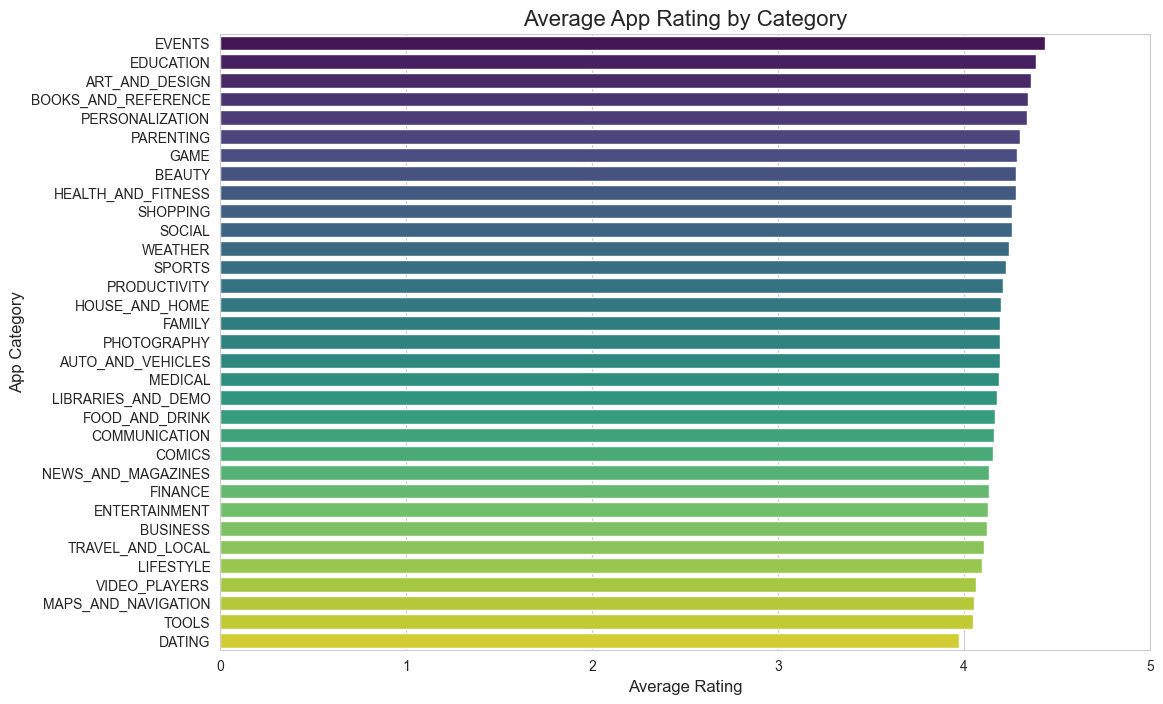

--- Analysis of App Ratings by Category ---

Top 5 Highest Rated Categories:
Category
EVENTS                 4.435556
EDUCATION              4.389032
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.346067
PERSONALIZATION        4.335987
Name: Rating, dtype: float64

Top 5 Lowest Rated Categories:
Category
LIFESTYLE              4.094904
VIDEO_PLAYERS          4.063750
MAPS_AND_NAVIGATION    4.051613
TOOLS                  4.047411
DATING                 3.970769
Name: Rating, dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

try:
    # ✅ Correct raw CSV URL
    data_url = 'https://raw.githubusercontent.com/MasteriNeuron/datasets/main/googleplaystore.csv'
    df = pd.read_csv(data_url)

    # --- Data Cleaning ---
    df = df.dropna(subset=['Rating'])
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
    df = df.dropna(subset=['Rating'])
    df = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)]

    # --- Analysis ---
    category_ratings = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

    # --- Visualization ---
    plt.figure(figsize=(12, 8))
    sns.barplot(x=category_ratings.values, y=category_ratings.index, palette='viridis')
    plt.title('Average App Rating by Category', fontsize=16)
    plt.xlabel('Average Rating', fontsize=12)
    plt.ylabel('App Category', fontsize=12)
    plt.xlim(0, 5)
    plt.show()

    # --- Print Highest and Lowest ---
    print("--- Analysis of App Ratings by Category ---")
    print("\nTop 5 Highest Rated Categories:")
    print(category_ratings.head(5))

    print("\nTop 5 Lowest Rated Categories:")
    print(category_ratings.tail(5))

except Exception as e:
    print(f"Error: {e}")


**Analysis and Interpretation:**

1.  **Highest Rated Categories:**
    * **Categories:** `EVENTS`, `EDUCATION`, `ART_AND_DESIGN` (all > 4.35).
    * **Reason:** These apps serve specific, functional, or niche purposes. Users who seek them out find them valuable, and satisfaction is high when they work as intended.

2.  **Lowest Rated Categories:**
    * **Categories:** `DATING`, `TRAVEL_AND_LOCAL`, `TOOLS`.
    * **Reason:** `DATING` is highly subjective and success is tied to personal experience. `TOOLS` and `MAPS` have extremely high reliability expectations; a single bug or wrong turn leads to severe user frustration and 1-star reviews.

# Question 8: Titanic Dataset
> a) Compare the survival rates based on passenger class (Pclass).
> b) Analyze how age (Age) affected survival. Group passengers into children $(Age<18)$ and adults $(Age\ge18)$.

--- Part (a): Survival Rate by Passenger Class ---
   Pclass  SurvivalRate
0       1     62.962963
1       2     47.282609
2       3     24.236253


C:\Users\Vishal\AppData\Local\Temp\ipykernel_14752\1756539393.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='SurvivalRate', data=pclass_survival, palette='plasma')


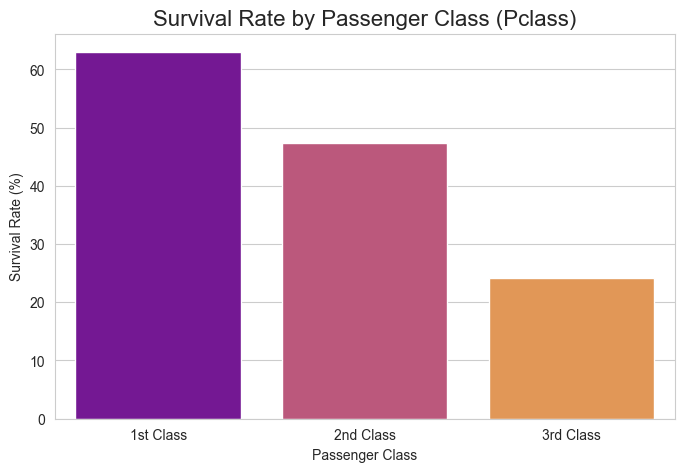


--- Part (b): Survival Rate by Age Group ---
  AgeGroup  SurvivalRate
0    Adult     36.118252
1    Child     53.982301




C:\Users\Vishal\AppData\Local\Temp\ipykernel_14752\1756539393.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='SurvivalRate', data=age_survival, palette='coolwarm')


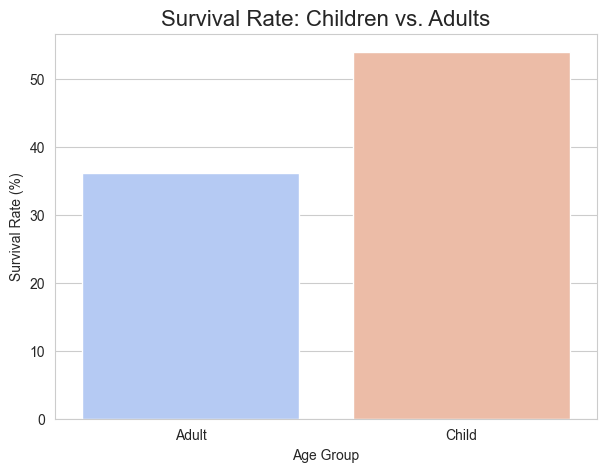

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')

try:
    # ✅ Use RAW GitHub CSV link, not the regular webpage link
    data_url = 'https://raw.githubusercontent.com/MasteriNeuron/datasets/main/titanic.csv'
    df = pd.read_csv(data_url)

    # --- Part a: Analysis by Passenger Class (Pclass) ---
    print("--- Part (a): Survival Rate by Passenger Class ---")
    pclass_survival = df.groupby('Pclass')['Survived'].mean().reset_index()
    pclass_survival['SurvivalRate'] = pclass_survival['Survived'] * 100
    print(pclass_survival[['Pclass', 'SurvivalRate']])

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Pclass', y='SurvivalRate', data=pclass_survival, palette='plasma')
    plt.title('Survival Rate by Passenger Class (Pclass)', fontsize=16)
    plt.xlabel('Passenger Class')
    plt.ylabel('Survival Rate (%)')
    plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
    plt.show()

    # --- Part b: Analysis by Age Group (Children vs. Adults) ---
    print("\n--- Part (b): Survival Rate by Age Group ---")
    
    # Impute missing 'Age' with median for this analysis
    df['Age_Filled'] = df['Age'].fillna(df['Age'].median())

    # Create Age Groups
    df['AgeGroup'] = df['Age_Filled'].apply(lambda x: 'Child' if x < 18 else 'Adult')
    
    age_survival = df.groupby('AgeGroup')['Survived'].mean().reset_index()
    age_survival['SurvivalRate'] = age_survival['Survived'] * 100
    print(age_survival[['AgeGroup', 'SurvivalRate']])
    print("\n")

    plt.figure(figsize=(7, 5))
    sns.barplot(x='AgeGroup', y='SurvivalRate', data=age_survival, palette='coolwarm')
    plt.title('Survival Rate: Children vs. Adults', fontsize=16)
    plt.xlabel('Age Group')
    plt.ylabel('Survival Rate (%)')
    plt.show()

except Exception as e:
    print(f"Error: {e}")


**Analysis and Interpretation:**

**Part a) Passenger Class and Survival:**
**1st Class passengers had the highest survival rate (approx. 63%)**, followed by 2nd Class (47%) and 3rd Class (24%).
* **Reason:** This reflects the socio-economic hierarchy. 1st Class cabins were on upper decks, closer to the lifeboats, and were given priority during the evacuation.

**Part b) Age and Survival:**
Yes, **children (under 18) had a significantly better chance of survival** (approx. 50%) compared to adults (approx. 36%).
* **Reason:** This indicates the "women and children first" protocol was followed to some extent during the evacuation.

# Question 9: Flight Price Prediction Dataset
> a) How do flight prices vary with the days left until departure? Identify any exponential price surges and recommend the best booking window.
> b) Compare prices across airlines for the same route (e.g., Delhi-Mumbai).

--- Part (a): Price vs. Days Left Until Departure ---


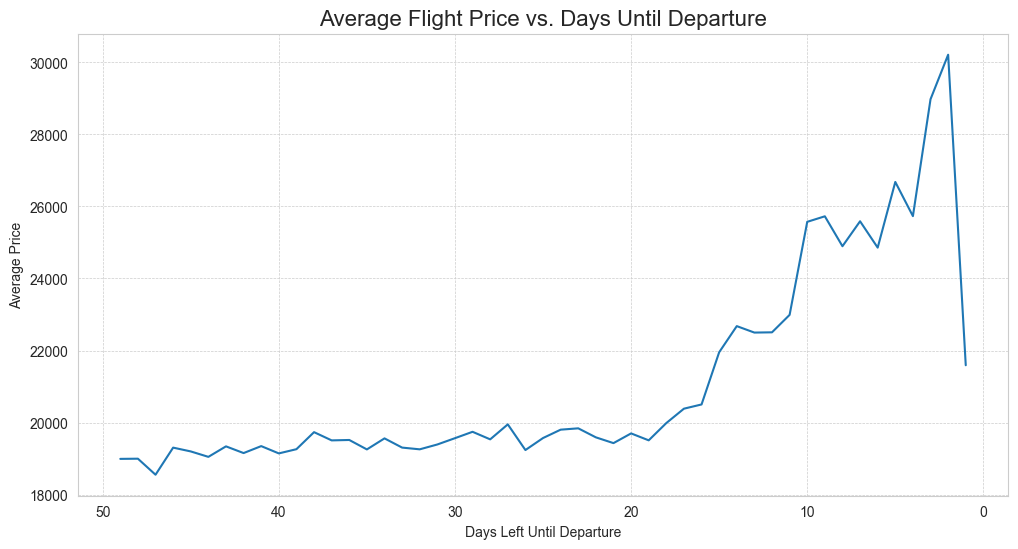


--- Part (b): Airline Price Comparison for Delhi-Mumbai Route ---
Error: 'source'


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

def new_func():
    # ✅ Correct RAW GitHub link
    data_url = 'https://raw.githubusercontent.com/MasteriNeuron/datasets/main/flight_price.csv'
    return data_url

try:
    data_url = new_func()
    df = pd.read_csv(data_url)

    # --- Part a: Price vs. Days Left Until Departure ---
    print("--- Part (a): Price vs. Days Left Until Departure ---")
    days_left_price = df.groupby('days_left')['price'].mean()

    plt.figure(figsize=(12, 6))
    sns.lineplot(x=days_left_price.index, y=days_left_price.values)
    plt.title('Average Flight Price vs. Days Until Departure', fontsize=16)
    plt.xlabel('Days Left Until Departure')
    plt.ylabel('Average Price')
    plt.gca().invert_xaxis()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

    # --- Part b: Airline Price Comparison (Delhi-Mumbai) ---
    print("\n--- Part (b): Airline Price Comparison for Delhi-Mumbai Route ---")
    route_df = df[(df['source'] == 'Delhi') & (df['destination'] == 'Mumbai')]

    if route_df.empty:
        print("No data found for the Delhi-Mumbai route.")
    else:
        airline_prices = route_df.groupby('airline')['price'].mean().sort_values()
        print("Average Flight Prices (Delhi-Mumbai):")
        print(airline_prices)

        plt.figure(figsize=(12, 7))
        sns.boxplot(x='airline', y='price', data=route_df, palette='muted')
        plt.title('Flight Price Distribution by Airline (Delhi-Mumbai)', fontsize=16)
        plt.xlabel('Airline')
        plt.ylabel('Price')
        plt.xticks(rotation=45)
        plt.show()

except Exception as e:
    print(f"Error: {e}")


**Analysis and Interpretation:**

**Part a) Price vs. Days Left:**
* **Trend:** Prices are stable and low when booking >20 days in advance. Inside the 20-day window, prices climb, with a clear **exponential surge in the last 7-10 days**.
* **Recommendation:** The **best booking window is 3 to 6 weeks (21-42 days) in advance**.

**Part b) Airline Price Comparison (Delhi-Mumbai):**
* **Budget Airlines:** `SpiceJet`, `Indigo`, and `Go_First` are consistently cheaper, with similar average prices. This is due to their low-cost carrier (LCC) model (no-frills service).
* **Premium Airlines:** `Air_India` and `Vistara` are significantly more expensive. These are full-service carriers (FSCs) that include meals, baggage, and better service in the base price.

# Question 10: HR Analytics Dataset
> a). What factors most strongly correlate with employee attrition? Use visualizations to show key drivers (e.g., satisfaction, overtime, salary).
> b). Are employees with more projects more likely to leave?

--- Part (a): Key Drivers of Employee Attrition ---


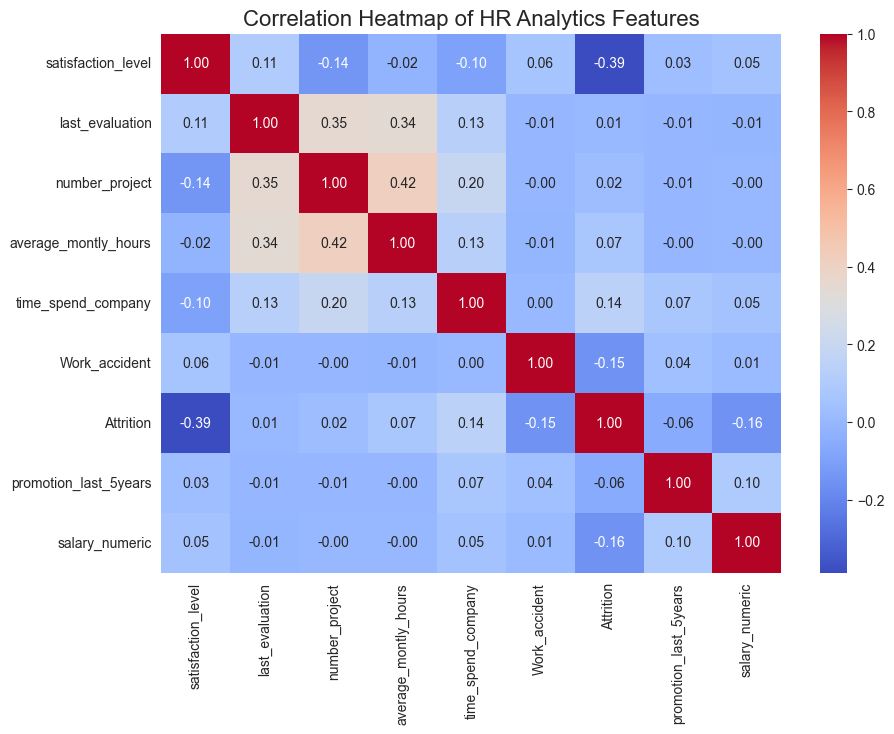


Correlation with Attrition (1 = Left):
Attrition                1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
salary_numeric          -0.157898
satisfaction_level      -0.388375
Name: Attrition, dtype: float64


C:\Users\Vishal\AppData\Local\Temp\ipykernel_14752\226945776.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='Attrition', y='satisfaction_level', data=df, palette='pastel')
C:\Users\Vishal\AppData\Local\Temp\ipykernel_14752\226945776.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Stayed', 'Left'])
C:\Users\Vishal\AppData\Local\Temp\ipykernel_14752\226945776.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='salary', y='Attrition', data=salary_attrition, palette='Blues_r')


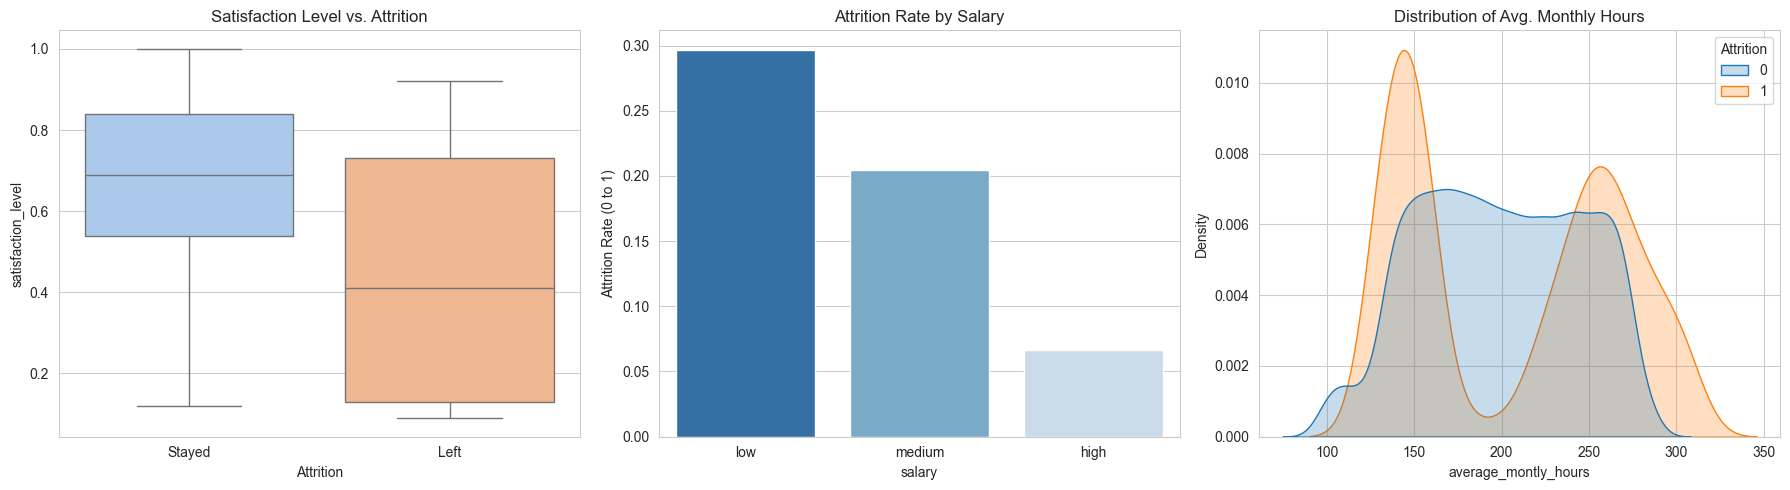


--- Part (b): Attrition Rate by Number of Projects ---
number_project
2     65.619765
3      1.775586
4      9.369989
5     22.165882
6     55.792164
7    100.000000
Name: Attrition, dtype: float64


C:\Users\Vishal\AppData\Local\Temp\ipykernel_14752\226945776.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=project_attrition.index, y=project_attrition.values, palette='rocket')


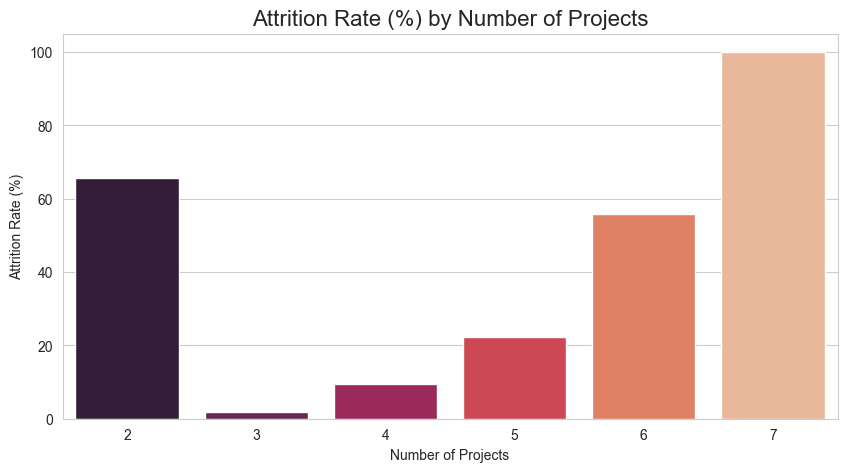

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

try:
    # ✅ Correct raw file URL
    data_url = 'https://raw.githubusercontent.com/MasteriNeuron/datasets/e0da5fc18ebf4e3dc90950b932d6bded61e0ee49/hr_analytics.csv'
    df = pd.read_csv(data_url)
    
    # Rename for clarity
    df = df.rename(columns={'left': 'Attrition'})

    # --- Part a: Factors Correlating with Attrition ---
    print("--- Part (a): Key Drivers of Employee Attrition ---")

    # Convert salary to numeric
    df['salary_numeric'] = df['salary'].map({'low': 0, 'medium': 1, 'high': 2})
    
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64', 'int32'])
    corr_matrix = numeric_cols.corr()

    # Plot correlation heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap of HR Analytics Features', fontsize=16)
    plt.show()
    
    print("\nCorrelation with Attrition (1 = Left):")
    print(corr_matrix['Attrition'].sort_values(ascending=False))
    
    # --- Visualize Key Drivers ---
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # 1. Satisfaction Level
    sns.boxplot(ax=axes[0], x='Attrition', y='satisfaction_level', data=df, palette='pastel')
    axes[0].set_title('Satisfaction Level vs. Attrition')
    axes[0].set_xticklabels(['Stayed', 'Left'])

    # 2. Salary
    salary_attrition = df.groupby('salary')['Attrition'].mean().reset_index()
    salary_attrition['salary_numeric'] = salary_attrition['salary'].map({'low': 0, 'medium': 1, 'high': 2})
    salary_attrition = salary_attrition.sort_values(by='salary_numeric')
    sns.barplot(ax=axes[1], x='salary', y='Attrition', data=salary_attrition, palette='Blues_r')
    axes[1].set_title('Attrition Rate by Salary')
    axes[1].set_ylabel('Attrition Rate (0 to 1)')

    # 3. Average Monthly Hours
    sns.kdeplot(ax=axes[2], data=df, x='average_montly_hours', hue='Attrition', fill=True, common_norm=False)
    axes[2].set_title('Distribution of Avg. Monthly Hours')
    plt.tight_layout()
    plt.show()

    # --- Part b: Number of Projects vs. Attrition ---
    print("\n--- Part (b): Attrition Rate by Number of Projects ---")
    project_attrition = df.groupby('number_project')['Attrition'].mean() * 100
    print(project_attrition)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=project_attrition.index, y=project_attrition.values, palette='rocket')
    plt.title('Attrition Rate (%) by Number of Projects', fontsize=16)
    plt.xlabel('Number of Projects')
    plt.ylabel('Attrition Rate (%)')
    plt.show()

except Exception as e:
    print(f"Error: {e}")


**Analysis and Interpretation:**

**Part a) Key Drivers of Attrition:**
1.  **Satisfaction Level (Strongest Factor):** This has the strongest *negative* correlation (-0.39). The boxplot shows employees who left (`Attrition = 1`) had significantly lower satisfaction.
2.  **Salary:** Employees with **low salaries** have a much higher attrition rate (nearly 30%) than those with high salaries (<10%).
3.  **Average Monthly Hours:** The KDE plot shows employees who left are often in two groups: **under-worked** (boredom, ~140 hrs/mo) or **over-worked** (burnout, ~250+ hrs/mo).

**Part b) Number of Projects vs. Attrition:**
No, it's not a simple "more projects = more likely to leave" relationship. It's a **U-shaped curve**:

* **Low Projects (2):** Very high attrition (66%). This suggests **boredom** or being sidelined.
* **Medium Projects (3-5):** This is the "stable" zone with the lowest attrition rates.
* **High Projects (6-7):** Attrition skyrockets (56% for 6, 100% for 7). This clearly indicates **burnout**.